In [53]:
import openai
import pandas as pd
import requests
import json
import openpyxl
import matplotlib.pyplot as plt

In [54]:
gen1 = pd.read_csv('gen1_rated.csv')
gen2 = pd.read_csv('gen2_rated.csv')
gen3 = pd.read_csv('gen3_rated.csv')
gen4 = pd.read_csv('gen4_rated.csv')

In [55]:
gen1.columns

Index(['Unnamed: 0', 'index', 'ResponseId', 'non-political post 1',
       'non-political post 2', 'political post 1', 'political post 2', 'age',
       'gender', 'ses', 'social_ideology', 'econ_ideology', 'partisanship1',
       'partisanship1_4_TEXT', 'partisanship2', 'partisanship3',
       'partisanship4_1', 'non-political post 1_cleaned',
       'non-political post 1_morality', 'non-political post 1_emotion',
       'non-political post 1_intergroup', 'non-political post 1_valence',
       'political post 1_cleaned', 'political post 1_morality',
       'political post 1_emotion', 'political post 1_intergroup',
       'political post 1_valence', 'non-political post 2_cleaned',
       'non-political post 2_morality', 'non-political post 2_emotion',
       'non-political post 2_intergroup', 'non-political post 2_valence',
       'political post 2_cleaned', 'political post 2_morality',
       'political post 2_emotion', 'political post 2_intergroup',
       'political post 2_valence'],

In [56]:
gen1 = gen1.drop(columns=['Unnamed: 0'])

In [74]:
# drop nan values in gen1 in cleaned column
gen1 = gen1.dropna(subset=['non-political post 1_cleaned', 'non-political post 2_cleaned', 'political post 1_cleaned', 'political post 2_cleaned'])

In [57]:
gen2.columns

Index(['Unnamed: 0', 'index', 'ResponseId', 'Q39_Page Submit',
       'non-political post 1', 'Q20_1', 'Q23_1', 'Q25_1', 'Q43_Page Submit',
       'non-political post 2', 'Q26_1', 'Q28_1', 'Q30_1', 'Q41_Page Submit',
       'political post 1', 'Q34_1', 'Q33_1', 'Q31_1', 'Q42_Page Submit',
       'political post 2', 'Q38_1', 'Q37_1', 'Q35_1', 'age', 'gender', 'ses',
       'social_ideology', 'econ_ideology', 'partisanship1',
       'partisanship1_4_TEXT', 'partisanship2', 'partisanship3',
       'partisanship4_1', 'selectedTexts_nonpoli_1', 'selectedTexts_nonpoli_2',
       'selectedTexts_poli_1', 'selectedTexts_poli_2',
       'non-political post 1_cleaned', 'non-political post 1_morality',
       'non-political post 1_emotion', 'non-political post 1_intergroup',
       'non-political post 1_valence', 'political post 1_cleaned',
       'political post 1_morality', 'political post 1_emotion',
       'political post 1_intergroup', 'political post 1_valence',
       'non-political post 2_

In [58]:
# rename columns
gen2 = gen2.rename(columns={'Q39_Page Submit': 'non-political post 1_time',
                            'Q20_1': 'non-political post 1_morality_human', 'Q23_1': 'non-political post 1_emotion_human', 'Q25_1': 'non-political post 1_valence_human',
                            'Q43_Page Submit': 'non-political post 2_time',
                            'Q26_1': 'non-political post 2_morality_human', 'Q28_1':'non-political post 2_emotion_human', 'Q30_1': 'non-political post 2_valence_human',
                            'Q41_Page Submit': 'political post 1_time',
                            'Q34_1': 'political post 1_morality_human', 'Q33_1': 'political post 1_emotion_human', 'Q31_1': 'political post 1_valence_human',
                            'Q42_Page Submit': 'political post 2_time',
                            'Q38_1': 'political post 2_morality_human', 'Q37_1': 'political post 2_emotion_human', 'Q35_1': 'political post 2_valence_human'})

In [60]:
columns_to_keep = ['index', 'ResponseId', 
                   'non-political post 1', 'non-political post 1_morality_human','non-political post 1_emotion_human','non-political post 1_valence_human', 
                     'non-political post 2', 'non-political post 2_morality_human','non-political post 2_emotion_human','non-political post 2_valence_human',
                   'political post 1', 'political post 1_morality_human','political post 1_emotion_human','political post 1_valence_human',
                     'political post 2', 'political post 2_morality_human','political post 2_emotion_human','political post 2_valence_human',
                       'age', 'gender', 'ses', 'social_ideology', 'econ_ideology', 'partisanship1','partisanship1_4_TEXT', 'partisanship2', 'partisanship3','partisanship4_1',
       'selectedTexts_nonpoli_1', 'selectedTexts_nonpoli_2',
       'selectedTexts_poli_1', 'selectedTexts_poli_2',
       'non-political post 1_cleaned',  'non-political post 1_time', 'non-political post 1_morality', 'non-political post 1_emotion', 'non-political post 1_intergroup', 'non-political post 1_valence',
       'non-political post 2_cleaned', 'non-political post 2_time', 'non-political post 2_morality', 'non-political post 2_emotion', 'non-political post 2_intergroup', 'non-political post 2_valence',
       'political post 1_cleaned','political post 1_time', 'political post 1_morality', 'political post 1_emotion', 'political post 1_intergroup', 'political post 1_valence',
       'political post 2_cleaned', 'political post 2_time','political post 2_morality', 'political post 2_emotion', 'political post 2_intergroup', 'political post 2_valence']

In [61]:
# re order and drop columns
gen2 = gen2[columns_to_keep]

In [62]:
gen2.columns

Index(['index', 'ResponseId', 'non-political post 1',
       'non-political post 1_morality_human',
       'non-political post 1_emotion_human',
       'non-political post 1_valence_human', 'non-political post 2',
       'non-political post 2_morality_human',
       'non-political post 2_emotion_human',
       'non-political post 2_valence_human', 'political post 1',
       'political post 1_morality_human', 'political post 1_emotion_human',
       'political post 1_valence_human', 'political post 2',
       'political post 2_morality_human', 'political post 2_emotion_human',
       'political post 2_valence_human', 'age', 'gender', 'ses',
       'social_ideology', 'econ_ideology', 'partisanship1',
       'partisanship1_4_TEXT', 'partisanship2', 'partisanship3',
       'partisanship4_1', 'selectedTexts_nonpoli_1', 'selectedTexts_nonpoli_2',
       'selectedTexts_poli_1', 'selectedTexts_poli_2',
       'non-political post 1_cleaned', 'non-political post 1_time',
       'non-political po

In [79]:
gen2 = gen2.dropna(subset=['non-political post 1_cleaned', 'non-political post 2_cleaned', 'political post 1_cleaned', 'political post 2_cleaned'])

In [84]:
gen3 = gen3.dropna(subset=['non-political post 1_cleaned', 'non-political post 2_cleaned', 'political post 1_cleaned', 'political post 2_cleaned'])

In [85]:
gen4 = gen4.dropna(subset=['non-political post 1_cleaned', 'non-political post 2_cleaned', 'political post 1_cleaned', 'political post 2_cleaned'])

In [63]:
gen3 = gen3.rename(columns={'Q39_Page Submit': 'non-political post 1_time',
                            'Q20_1': 'non-political post 1_morality_human', 'Q23_1': 'non-political post 1_emotion_human', 'Q25_1': 'non-political post 1_valence_human',
                            'Q43_Page Submit': 'non-political post 2_time',
                            'Q26_1': 'non-political post 2_morality_human', 'Q28_1':'non-political post 2_emotion_human', 'Q30_1': 'non-political post 2_valence_human',
                            'Q41_Page Submit': 'political post 1_time',
                            'Q34_1': 'political post 1_morality_human', 'Q33_1': 'political post 1_emotion_human', 'Q31_1': 'political post 1_valence_human',
                            'Q42_Page Submit': 'political post 2_time',
                            'Q38_1': 'political post 2_morality_human', 'Q37_1': 'political post 2_emotion_human', 'Q35_1': 'political post 2_valence_human'})

In [64]:
gen3 = gen3[columns_to_keep]

In [65]:
gen4 = gen4.rename(columns={'Q39_Page Submit': 'non-political post 1_time',
                            'Q20_1': 'non-political post 1_morality_human', 'Q23_1': 'non-political post 1_emotion_human', 'Q25_1': 'non-political post 1_valence_human',
                            'Q43_Page Submit': 'non-political post 2_time',
                            'Q26_1': 'non-political post 2_morality_human', 'Q28_1':'non-political post 2_emotion_human', 'Q30_1': 'non-political post 2_valence_human',
                            'Q41_Page Submit': 'political post 1_time',
                            'Q34_1': 'political post 1_morality_human', 'Q33_1': 'political post 1_emotion_human', 'Q31_1': 'political post 1_valence_human',
                            'Q42_Page Submit': 'political post 2_time',
                            'Q38_1': 'political post 2_morality_human', 'Q37_1': 'political post 2_emotion_human', 'Q35_1': 'political post 2_valence_human'})

In [66]:
gen4 = gen4[columns_to_keep]

In [67]:
eda_stats_gen1 = gen1.describe()
eda_stats_gen1

,index,partisanship4_1,non-political post 1_morality,non-political post 1_emotion,non-political post 1_intergroup,non-political post 1_valence,political post 1_morality,political post 1_emotion,political post 1_intergroup,political post 1_valence,non-political post 2_morality,non-political post 2_emotion,non-political post 2_intergroup,non-political post 2_valence,political post 2_morality,political post 2_emotion,political post 2_intergroup,political post 2_valence
count,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000
mean,29.442308,4.403846,3.173077,3.384615,1.098039,1.423077,3.211538,2.923077,3.000000,3.615385,1.923077,2.686275,1.096154,3.846154,2.596154,3.294118,2.038462,1.519231
std,15.251375,2.451567,1.183566,0.910803,0.360827,0.775764,1.108550,0.925587,1.028992,1.497106,0.859689,0.969334,0.454158,1.391636,1.052720,1.118823,1.083957,1.019234
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.750000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000
50%,29.500000,5.000000,4.000000,4.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,1.000000,5.000000,3.000000,4.000000,2.000000,1.000000
75%,42.250000,5.250000,4.000000,4.000000,1.000000,2.000000,4.000000,3.250000,4.000000,5.000000,3.000000,3.000000,1.000000,5.000000,3.000000,4.000000,3.000000,1.250000
max,55.000000,9.000000,5.000000,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000


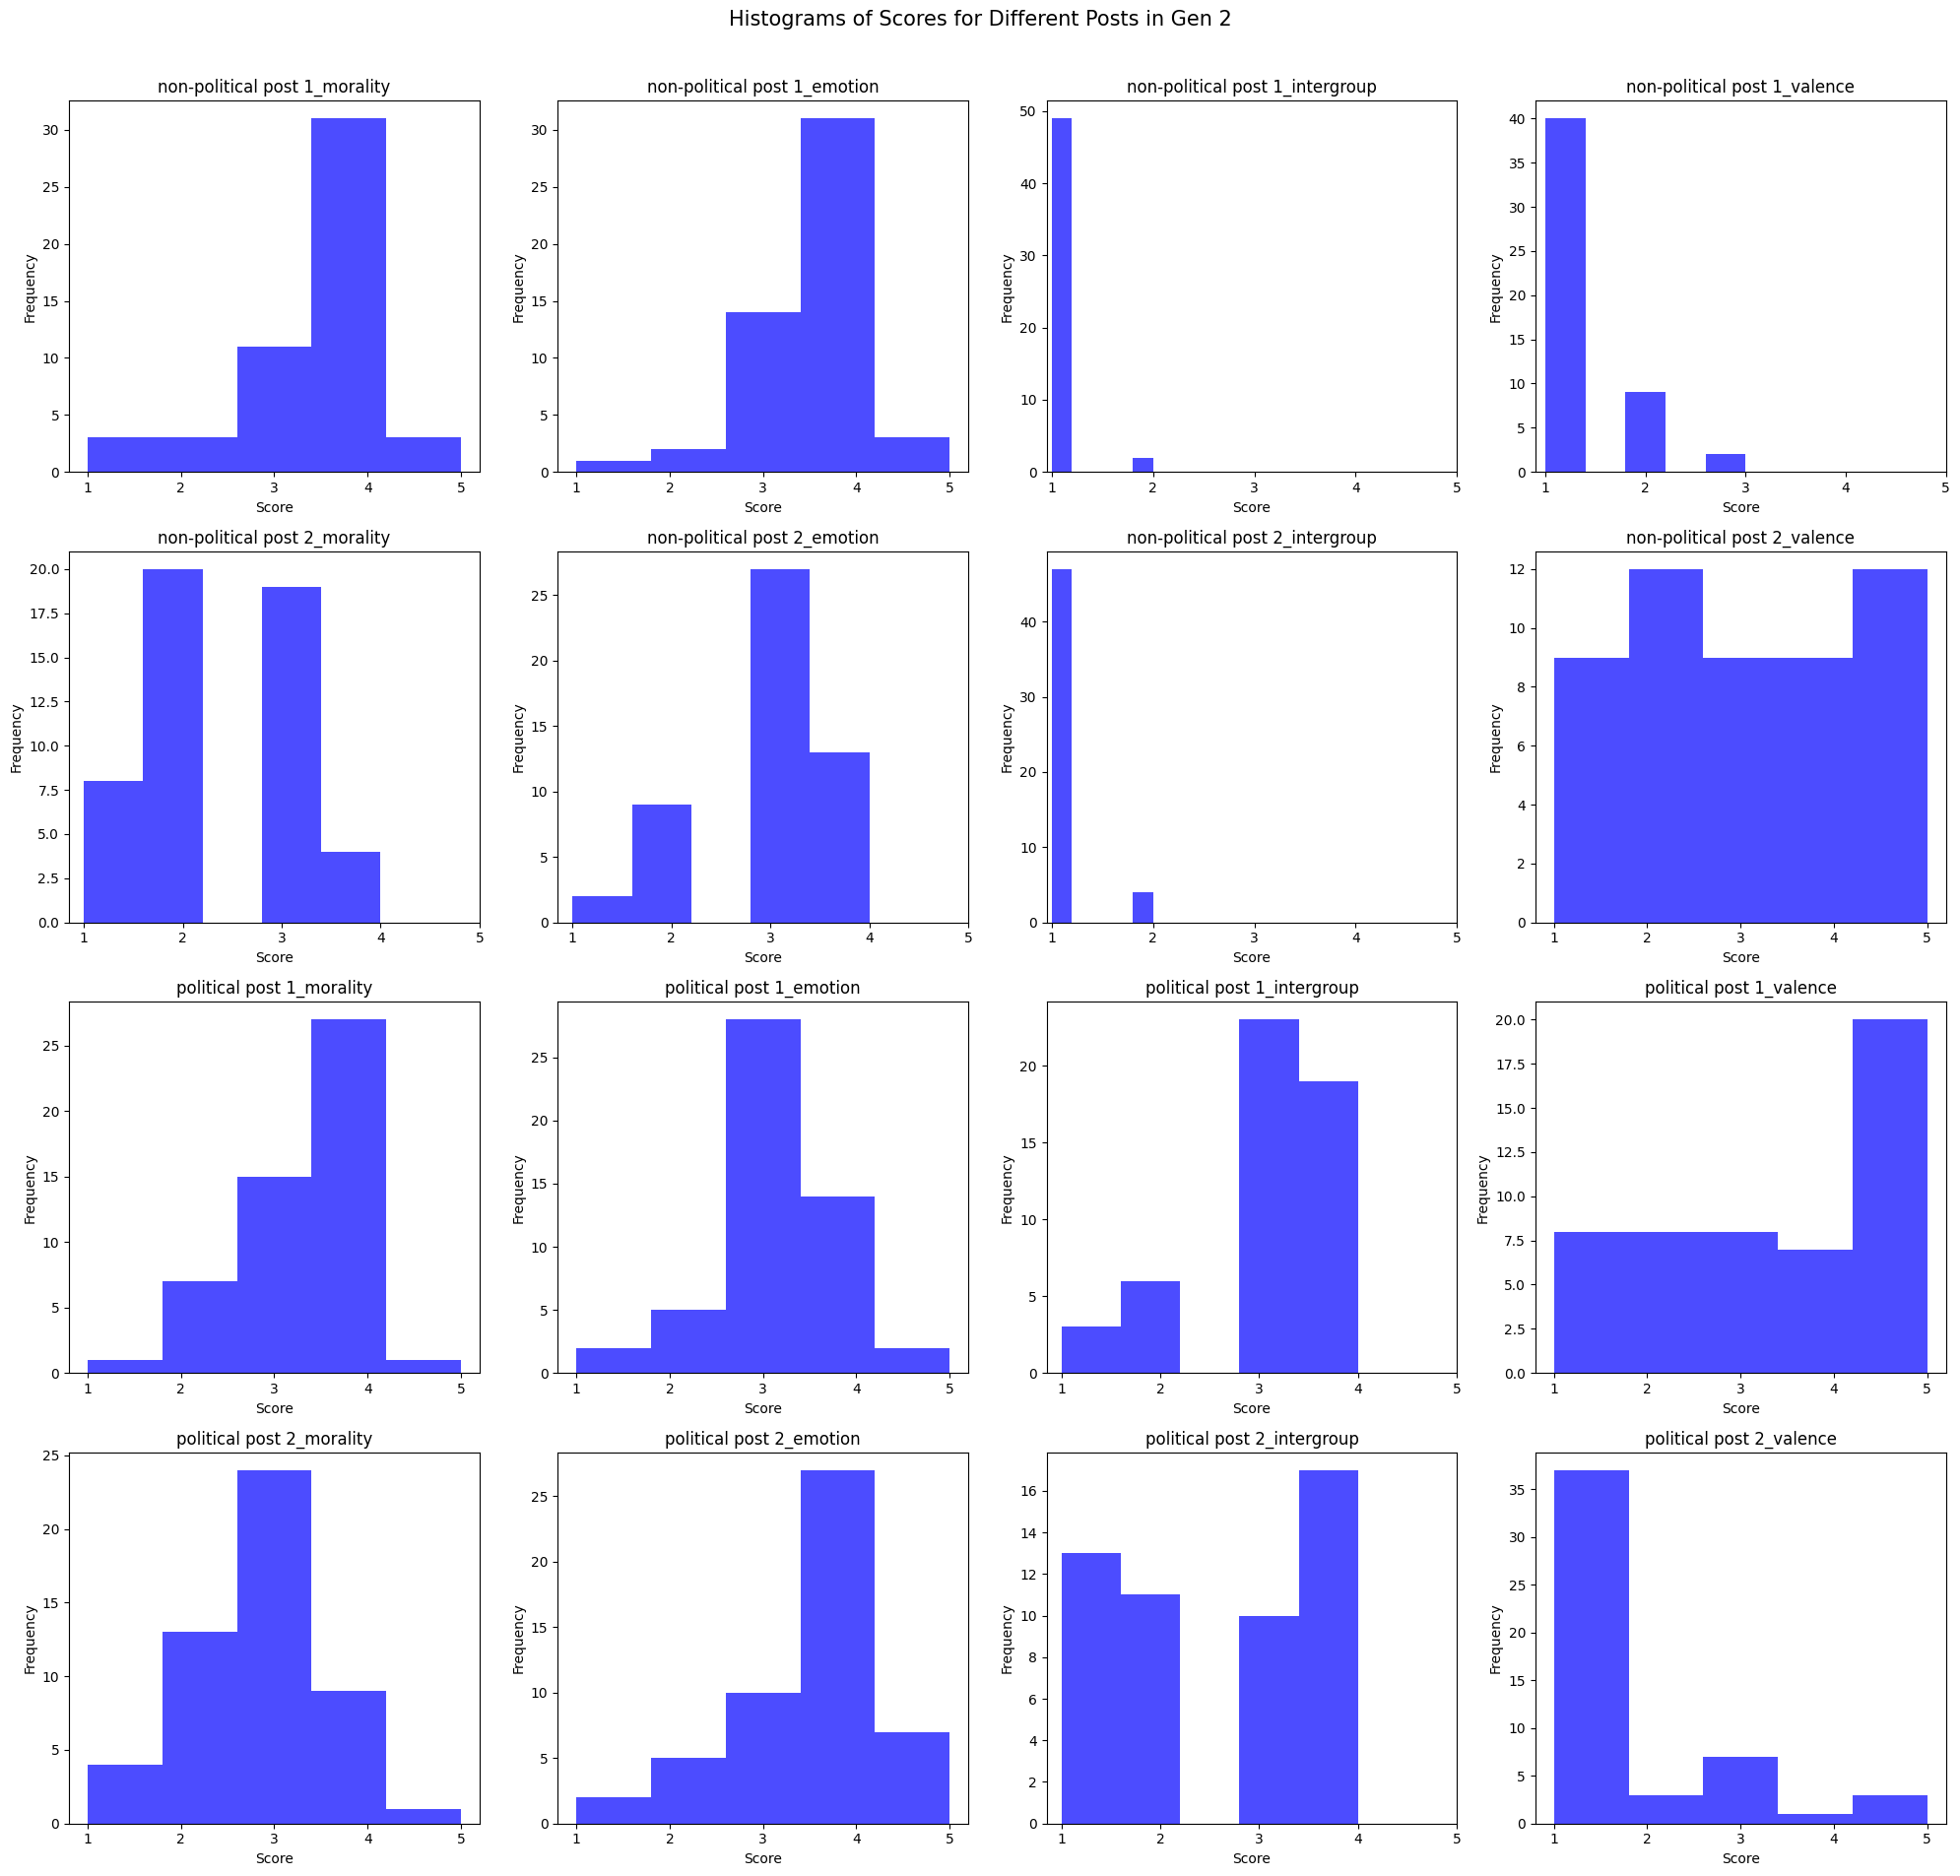

In [92]:
# Generate histograms for the scores of different posts
columns_of_interest = [
    'non-political post 1_morality', 'non-political post 1_emotion', 'non-political post 1_intergroup', 'non-political post 1_valence',
    'non-political post 2_morality', 'non-political post 2_emotion', 'non-political post 2_intergroup', 'non-political post 2_valence',
    'political post 1_morality', 'political post 1_emotion', 'political post 1_intergroup', 'political post 1_valence',
    'political post 2_morality', 'political post 2_emotion', 'political post 2_intergroup', 'political post 2_valence'
]

# Plotting histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ax, column in zip(axes, columns_of_interest):
    ax.hist(gen2[column], bins=5, alpha=0.7, color='blue')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4, 5])
fig.suptitle('Histograms of Scores for Different Posts in Gen 2', fontsize=15 )
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [94]:
# Add a generation column
gen1['generation'] = 'gen1'
gen2['generation'] = 'gen2'
gen3['generation'] = 'gen3'
gen4['generation'] = 'gen4'
#gen5['generation'] = 'gen5'

# Combine the datasets
combined_data = pd.concat([gen1, gen2, gen3, gen4], ignore_index=True)

C:\Users\kkwit\AppData\Local\Temp\ipykernel_15204\1029063276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen1['generation'] = 'gen1'
C:\Users\kkwit\AppData\Local\Temp\ipykernel_15204\1029063276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen2['generation'] = 'gen2'


C:\Users\kkwit\AppData\Local\Temp\ipykernel_15204\895127159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = combined_data.groupby('generation').mean().reset_index()
C:\Users\kkwit\AppData\Local\Temp\ipykernel_15204\895127159.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_scores = combined_data.groupby('generation').std().reset_index()


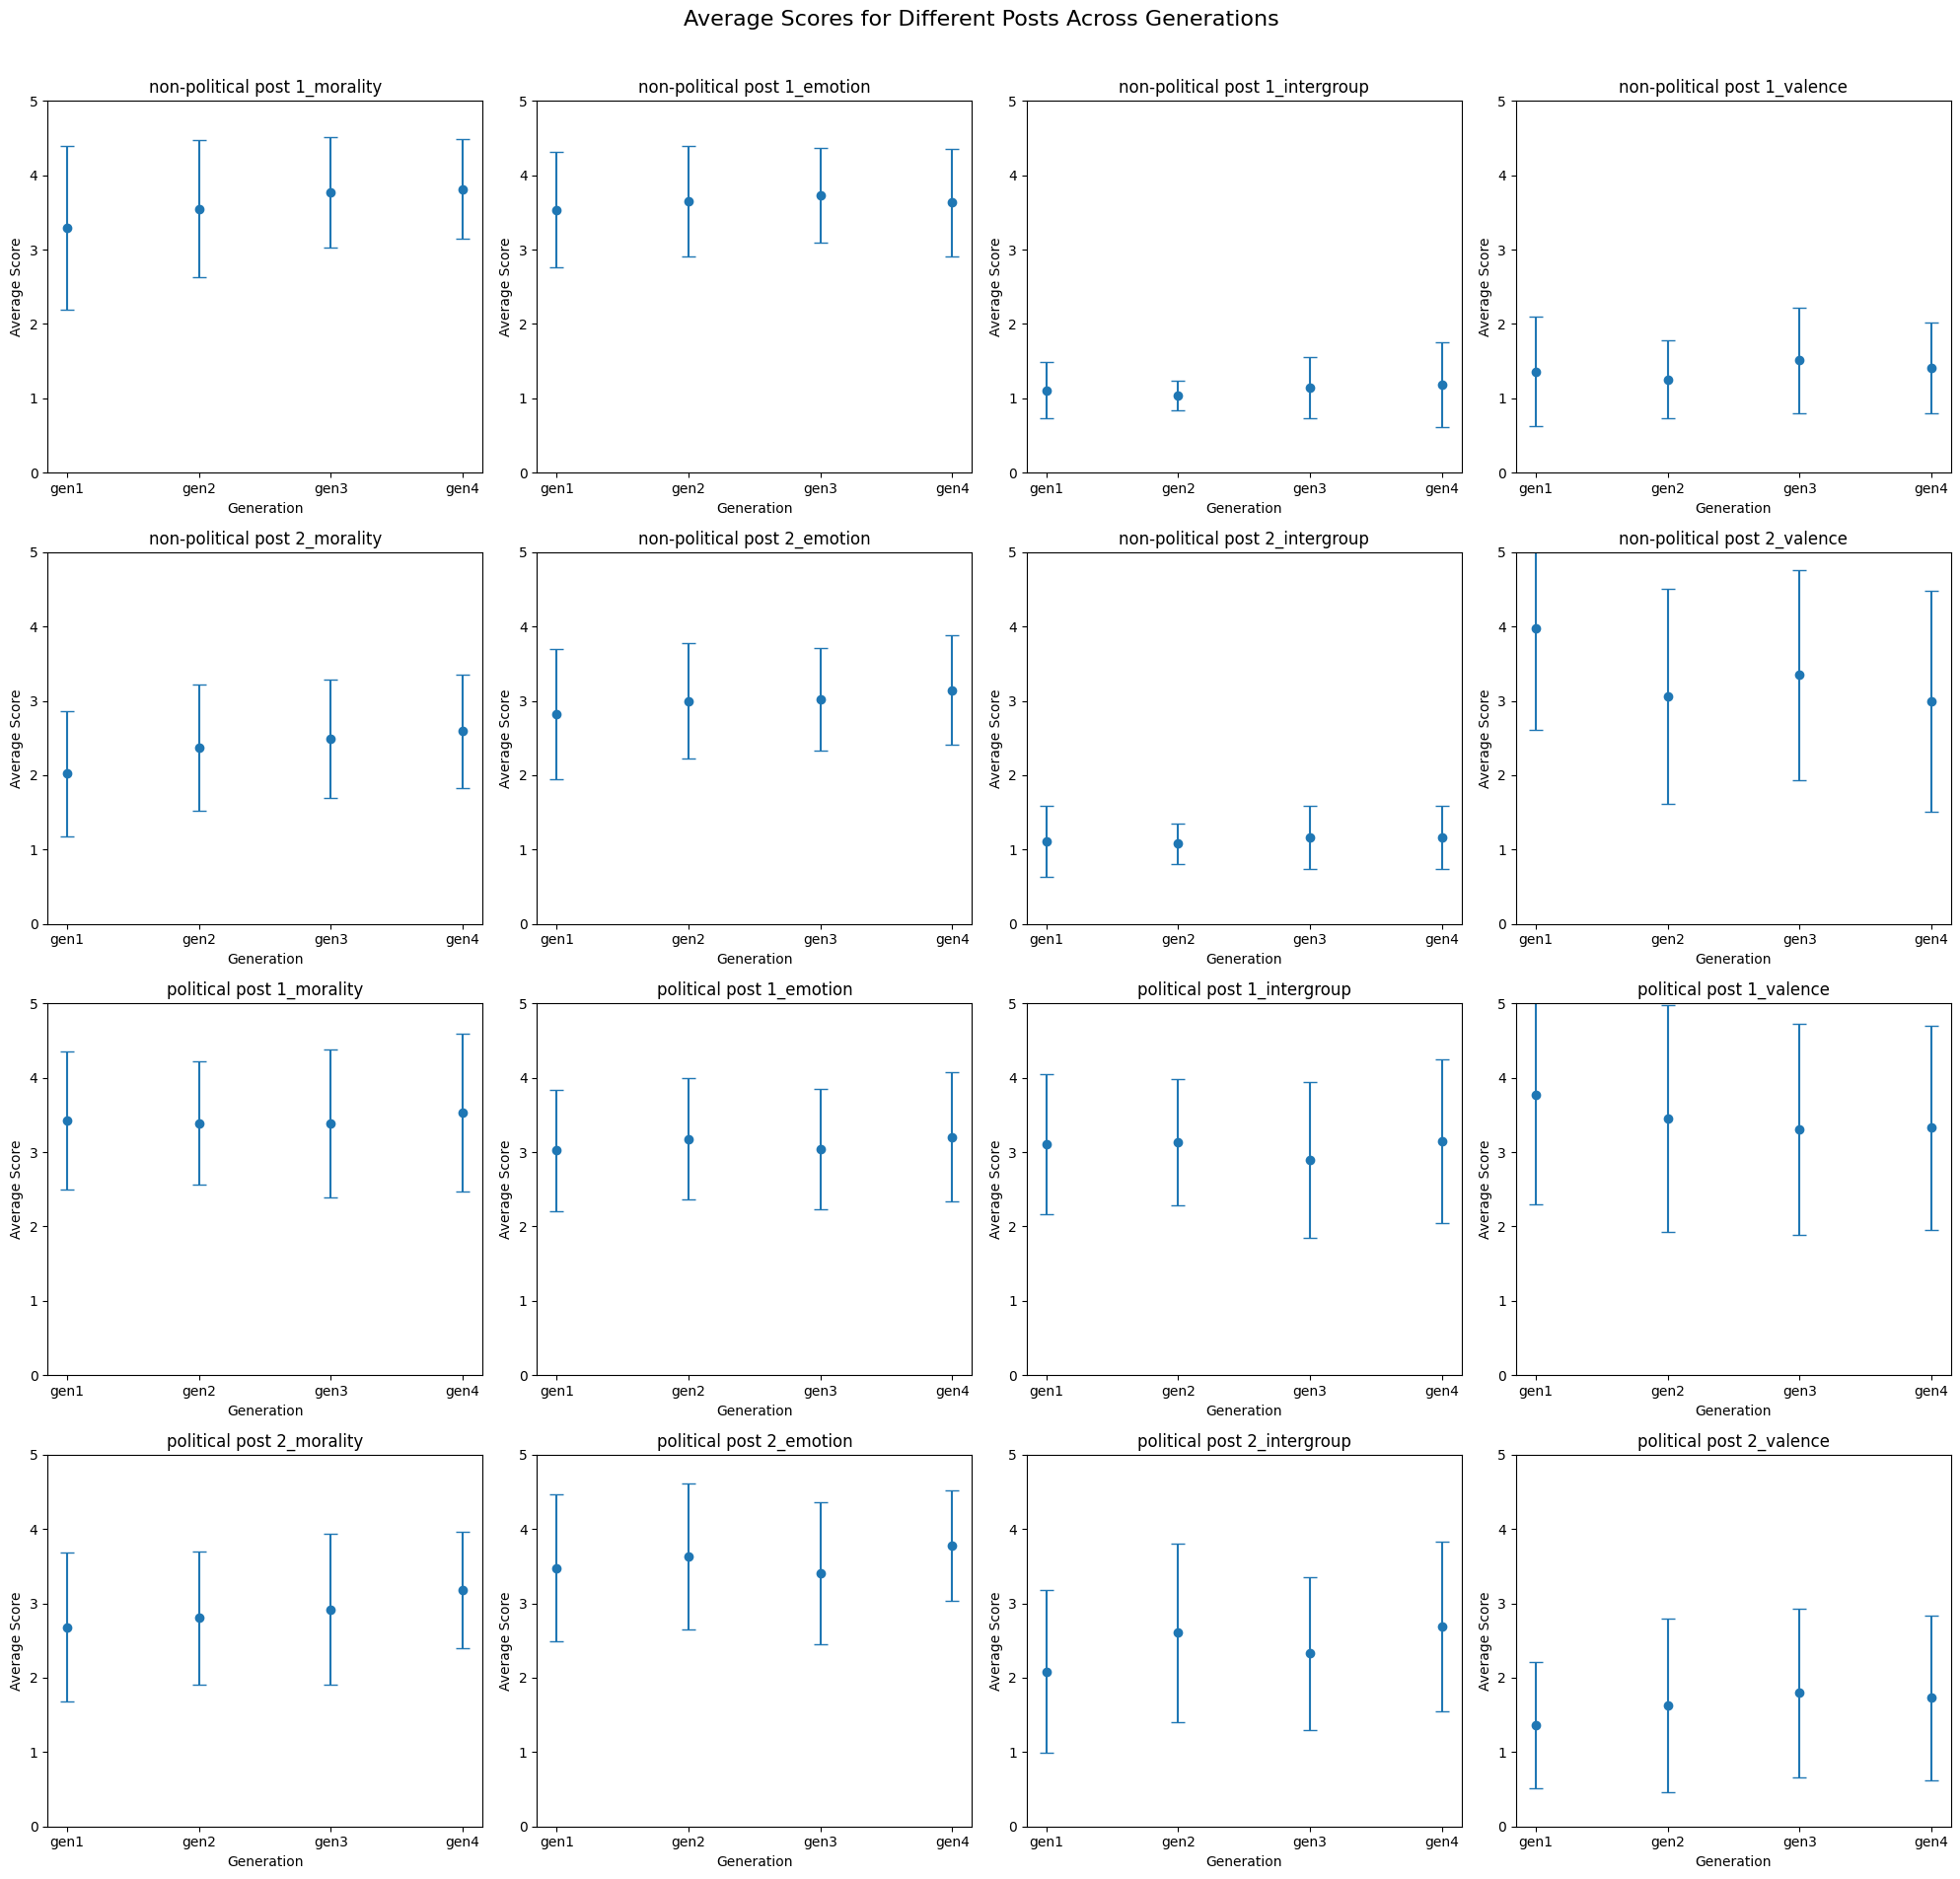

In [97]:
# Calculate the average scores
average_scores = combined_data.groupby('generation').mean().reset_index()

# Calculate the standard deviation for error bars
std_scores = combined_data.groupby('generation').std().reset_index()

# Plot the results with error bars
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ax, column in zip(axes, columns_of_interest):
    ax.errorbar(average_scores['generation'], average_scores[column], yerr=std_scores[column], fmt='o', capsize=5)
    ax.set_title(column)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Average Score')
    ax.set_ylim(0, 5)  # Assuming the scores are between 0 and 5
    ax.set_xticks(range(len(average_scores['generation'])))
    ax.set_xticklabels(average_scores['generation'])

fig.suptitle('Average Scores for Different Posts Across Generations', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to reduce space
plt.show()


In [100]:
human_columns = ['non-political post 1_morality_human', 'non-political post 1_emotion_human', 'non-political post 1_valence_human', 
                    'non-political post 2_morality_human', 'non-political post 2_emotion_human', 'non-political post 2_valence_human',
                    'political post 1_morality_human', 'political post 1_emotion_human', 'political post 1_valence_human',
                    'political post 2_morality_human', 'political post 2_emotion_human', 'political post 2_valence_human']

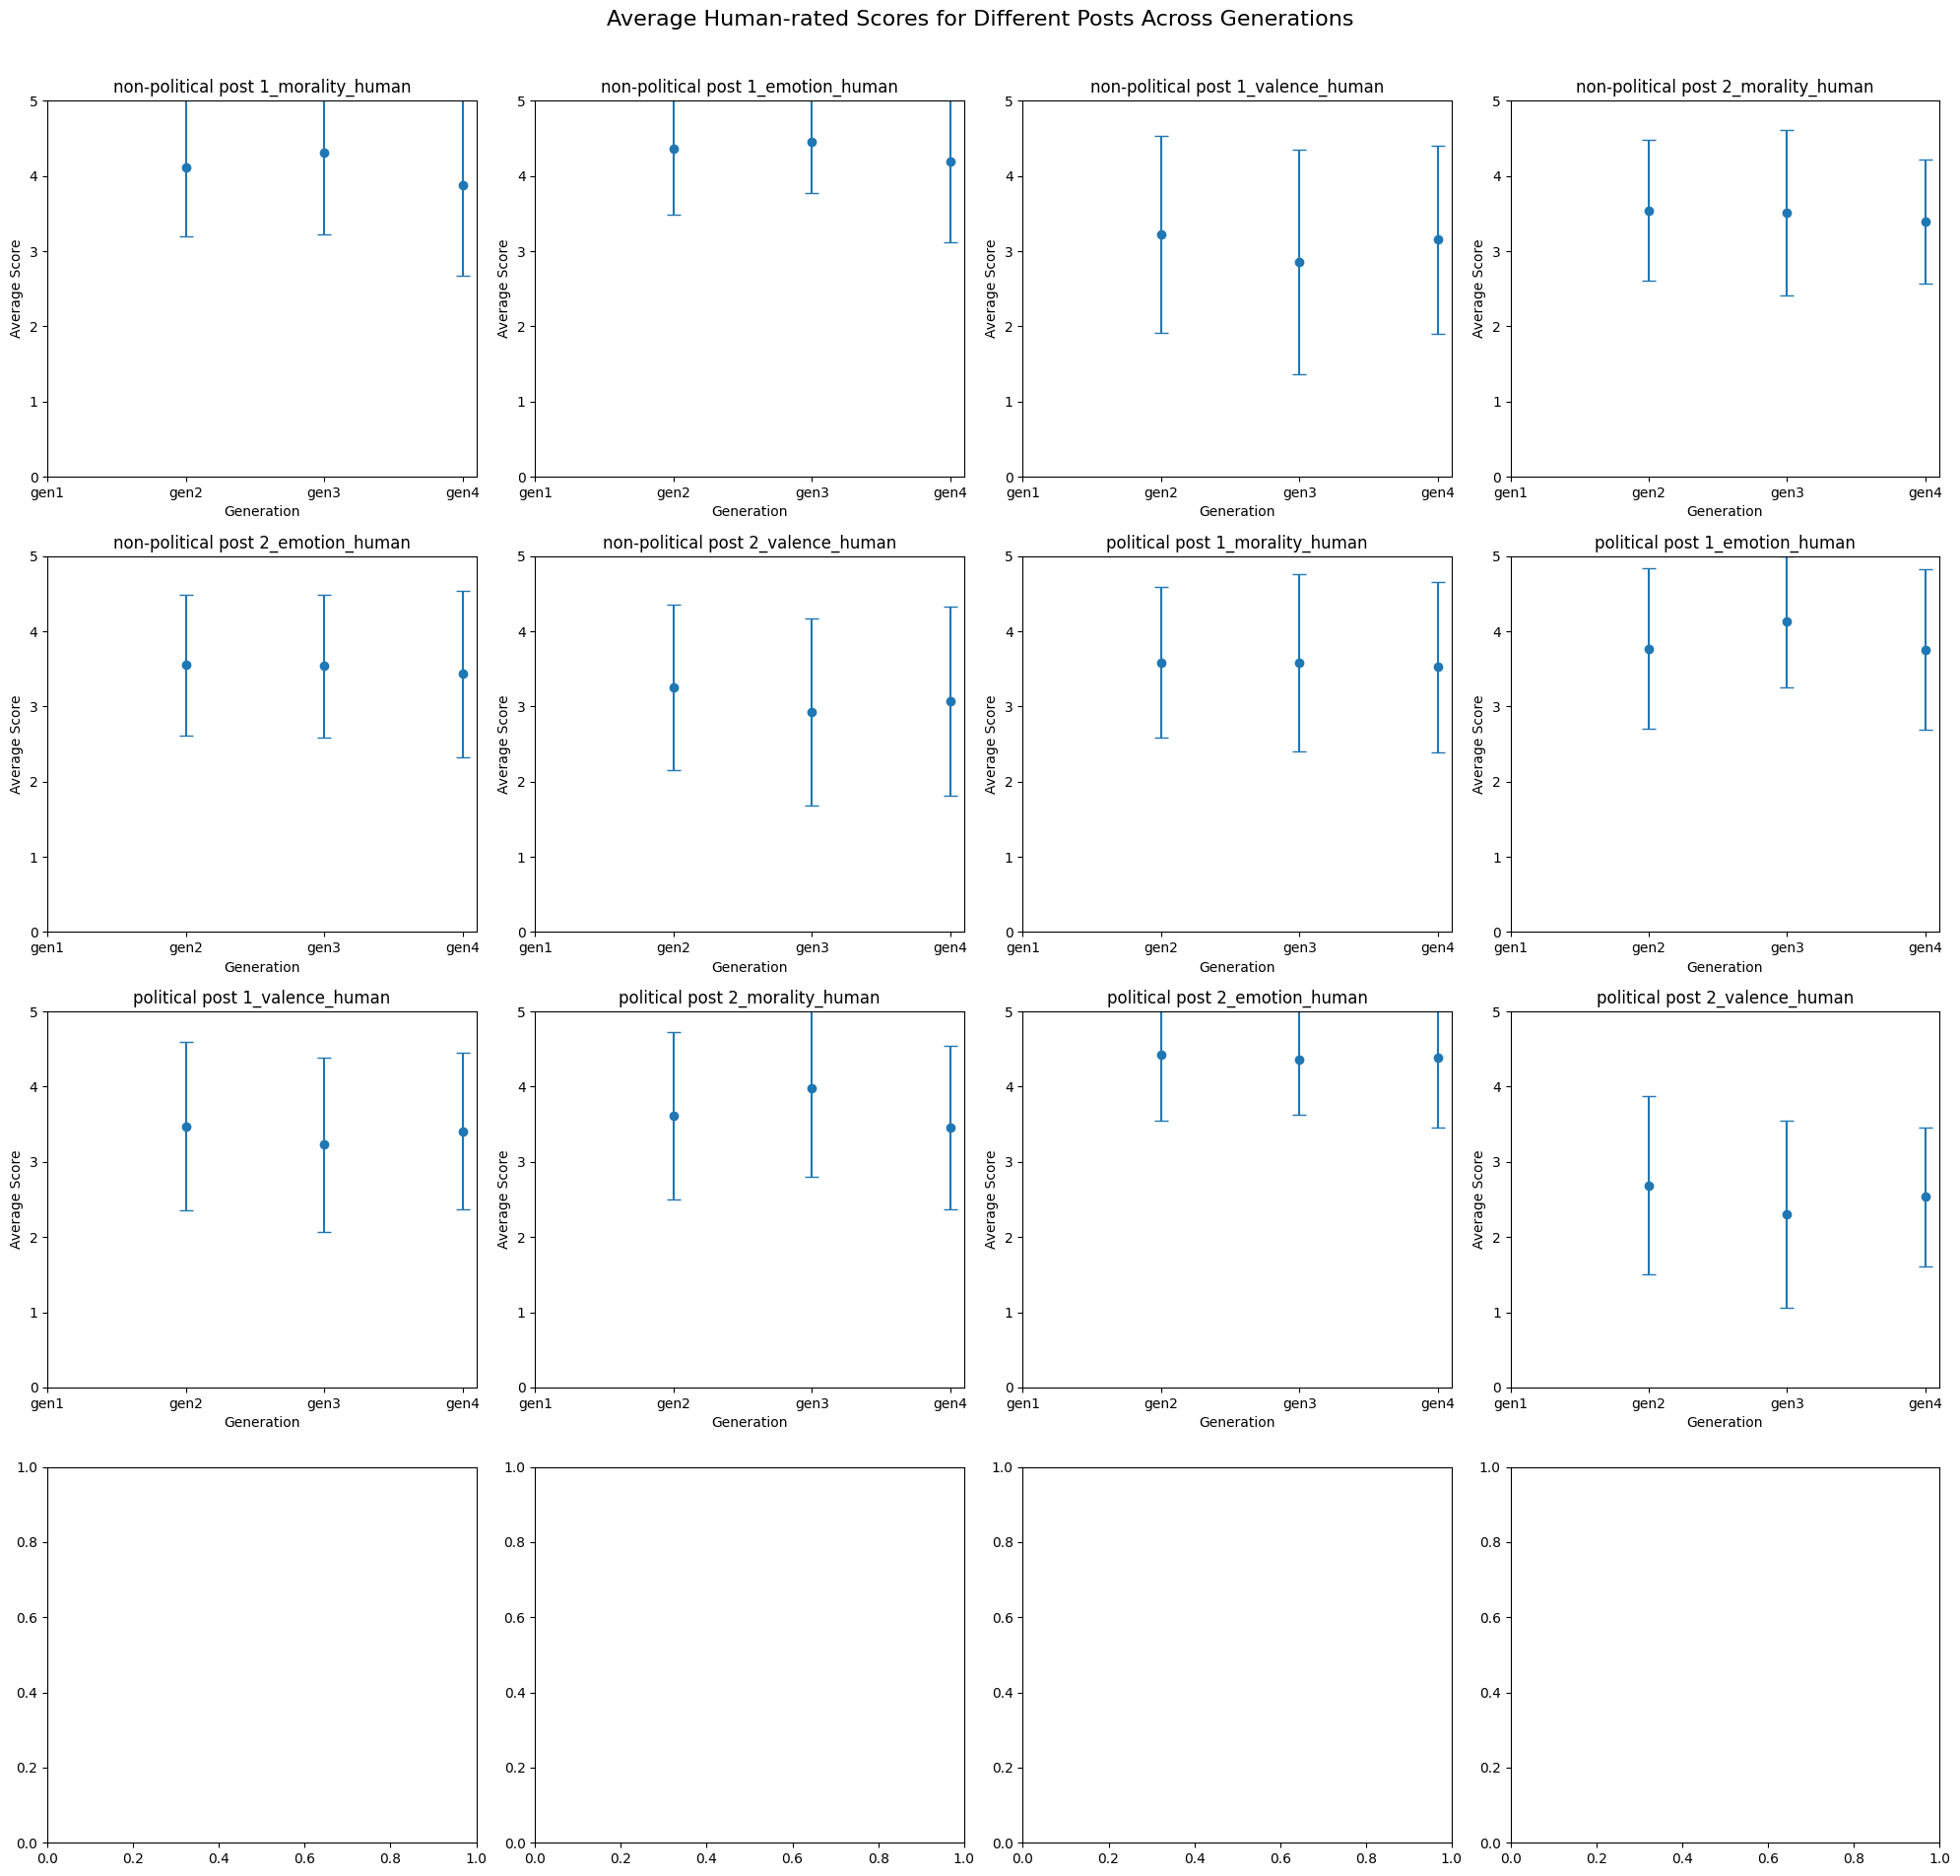

In [102]:
# Plot the results with error bars
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ax, column in zip(axes, human_columns):
    ax.errorbar(average_scores['generation'], average_scores[column], yerr=std_scores[column], fmt='o', capsize=5)
    ax.set_title(column)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Average Score')
    ax.set_ylim(0, 5)  # Assuming the scores are between 0 and 5
    ax.set_xticks(range(len(average_scores['generation'])))
    ax.set_xticklabels(average_scores['generation'])

fig.suptitle('Average Human-rated Scores for Different Posts Across Generations', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to reduce space
plt.show()